<a href="https://colab.research.google.com/github/esevinc/SER/blob/main/EmoDBFisher_65.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys

main_dir='drive/MyDrive/SER/'

data = pd.read_csv(main_dir+'../ravdes/featureEmodb_Ek.csv')

#data = pd.read_csv('../ravdes/featureEmodb_Ek.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,185,186,187,188,189,190,191,192,gender,emo
0,-291.023743,122.103310,-44.846886,59.766186,-24.904373,23.310034,-18.901543,-4.398162,-2.784216,-9.171474,...,16.934180,44.290817,0.010006,0.012283,-0.032002,0.024771,0.008110,0.001527,0,6
1,-275.305420,138.871933,-33.697144,49.522625,-7.244414,14.749916,-5.809273,-8.138051,-7.884721,-2.113137,...,19.170462,42.127514,-0.001838,0.006182,-0.084598,0.109258,-0.025841,-0.003582,0,3
2,-226.691788,95.119919,-73.665314,41.528965,-27.266602,11.262508,-13.882312,-9.181475,-10.468313,-10.647150,...,19.369836,43.109701,0.000832,-0.006184,-0.034412,-0.076670,0.011311,-0.001623,0,1
3,-274.819733,100.031342,-37.423729,36.635162,-22.137280,17.577888,-11.324630,-2.312308,-11.398092,-17.833254,...,17.451906,46.304244,0.039056,-0.017722,-0.080997,-0.049779,0.015512,-0.007105,0,6
4,-253.606750,150.312592,-25.341574,45.506142,-0.686996,5.291062,1.370816,-1.645677,-12.028738,-10.254305,...,19.763224,39.307039,0.004677,-0.009056,-0.025911,-0.049394,0.005211,0.028331,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-256.870941,106.805382,-42.942406,76.135025,-23.356741,9.561186,-15.960503,-6.739610,-2.011499,-10.854325,...,19.849010,44.480497,0.013730,-0.044924,0.036141,-0.103874,0.014027,0.004247,1,2
531,-247.077347,92.381683,-25.850836,57.561165,-6.191659,18.602076,-3.402066,-4.480618,3.263244,-6.546418,...,18.877839,45.172986,0.022582,0.051643,0.111258,0.034694,0.032592,-0.023957,1,7
532,-288.360962,89.563797,-22.478836,60.567955,-0.328118,19.141325,0.582287,1.187719,4.120030,-6.690523,...,17.697322,45.060143,0.064397,0.045831,-0.014433,0.036813,-0.002724,-0.039336,1,7
533,-330.462524,68.713730,-88.104507,64.599174,-49.094189,-2.239225,-19.608362,-12.148569,-5.809820,-29.100821,...,21.775347,42.181517,0.004429,0.004515,-0.046787,-0.008189,-0.011627,0.014819,1,1


In [ ]:
data.shape

(535, 195)

In [ ]:
df=data.loc[data.iloc[:,-2] == 1] #female
#ymale=data.loc[data.iloc[:,-2] == 1]

In [ ]:
data.iloc[:,-2] == 1 #female

0      False
1      False
2      False
3      False
4      False
       ...  
530     True
531     True
532     True
533     True
534     True
Name: gender, Length: 535, dtype: bool

In [ ]:
X=df.iloc[:,:-2].copy()
y=df.iloc[:,-1].copy()

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
49,-243.118134,101.169609,-50.598392,39.218571,-28.233164,27.637331,-21.413340,-9.535524,-0.608191,-16.777136,...,15.609501,18.693084,17.090400,44.527632,0.016980,0.017485,0.021251,-0.077282,-0.011537,-0.013300
50,-185.887329,103.091148,-33.120857,48.705719,-18.606981,16.923378,-10.412488,2.006570,-0.425235,-6.049371,...,14.983278,16.689231,17.622878,45.204984,-0.006809,0.013446,0.045454,0.115003,0.011521,0.032169
51,-297.380981,112.453789,-16.562181,30.691936,-10.833437,20.403870,-7.399225,-9.639145,-3.929489,-11.859133,...,16.867206,18.441991,17.694057,43.511830,-0.081166,0.044552,0.183662,-0.005531,-0.015517,0.079707
52,-318.164886,122.401115,-18.245230,53.716877,-19.226782,31.701225,-6.001442,1.418607,-0.009119,-6.382710,...,14.593920,17.333949,16.977184,44.402513,-0.042349,-0.023789,-0.001787,-0.071283,0.004602,0.009420
53,-316.829803,79.333473,-75.858727,44.693348,-43.686604,21.129812,-24.576170,-11.165303,-1.406534,-15.017246,...,18.035377,17.966855,18.110920,44.478812,0.002497,-0.002947,-0.029896,0.001681,-0.000319,-0.006408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-256.870941,106.805382,-42.942406,76.135025,-23.356741,9.561186,-15.960503,-6.739610,-2.011499,-10.854325,...,16.838264,17.836653,19.849010,44.480497,0.013730,-0.044924,0.036141,-0.103874,0.014027,0.004247
531,-247.077347,92.381683,-25.850836,57.561165,-6.191659,18.602076,-3.402066,-4.480618,3.263244,-6.546418,...,15.285443,17.030423,18.877839,45.172986,0.022582,0.051643,0.111258,0.034694,0.032592,-0.023957
532,-288.360962,89.563797,-22.478836,60.567955,-0.328118,19.141325,0.582287,1.187719,4.120030,-6.690523,...,14.401903,15.672472,17.697322,45.060143,0.064397,0.045831,-0.014433,0.036813,-0.002724,-0.039336
533,-330.462524,68.713730,-88.104507,64.599174,-49.094189,-2.239225,-19.608362,-12.148569,-5.809820,-29.100821,...,19.919413,19.620037,21.775347,42.181517,0.004429,0.004515,-0.046787,-0.008189,-0.011627,0.014819


In [ ]:
#y=y-1
y

49     5
50     6
51     2
52     3
53     1
      ..
530    2
531    7
532    7
533    1
534    1
Name: emo, Length: 302, dtype: int64

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
49,-243.118134,101.169609,-50.598392,39.218571,-28.233164,27.637331,-21.413340,-9.535524,-0.608191,-16.777136,...,15.609501,18.693084,17.090400,44.527632,0.016980,0.017485,0.021251,-0.077282,-0.011537,-0.013300
50,-185.887329,103.091148,-33.120857,48.705719,-18.606981,16.923378,-10.412488,2.006570,-0.425235,-6.049371,...,14.983278,16.689231,17.622878,45.204984,-0.006809,0.013446,0.045454,0.115003,0.011521,0.032169
51,-297.380981,112.453789,-16.562181,30.691936,-10.833437,20.403870,-7.399225,-9.639145,-3.929489,-11.859133,...,16.867206,18.441991,17.694057,43.511830,-0.081166,0.044552,0.183662,-0.005531,-0.015517,0.079707
52,-318.164886,122.401115,-18.245230,53.716877,-19.226782,31.701225,-6.001442,1.418607,-0.009119,-6.382710,...,14.593920,17.333949,16.977184,44.402513,-0.042349,-0.023789,-0.001787,-0.071283,0.004602,0.009420
53,-316.829803,79.333473,-75.858727,44.693348,-43.686604,21.129812,-24.576170,-11.165303,-1.406534,-15.017246,...,18.035377,17.966855,18.110920,44.478812,0.002497,-0.002947,-0.029896,0.001681,-0.000319,-0.006408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-256.870941,106.805382,-42.942406,76.135025,-23.356741,9.561186,-15.960503,-6.739610,-2.011499,-10.854325,...,16.838264,17.836653,19.849010,44.480497,0.013730,-0.044924,0.036141,-0.103874,0.014027,0.004247
531,-247.077347,92.381683,-25.850836,57.561165,-6.191659,18.602076,-3.402066,-4.480618,3.263244,-6.546418,...,15.285443,17.030423,18.877839,45.172986,0.022582,0.051643,0.111258,0.034694,0.032592,-0.023957
532,-288.360962,89.563797,-22.478836,60.567955,-0.328118,19.141325,0.582287,1.187719,4.120030,-6.690523,...,14.401903,15.672472,17.697322,45.060143,0.064397,0.045831,-0.014433,0.036813,-0.002724,-0.039336
533,-330.462524,68.713730,-88.104507,64.599174,-49.094189,-2.239225,-19.608362,-12.148569,-5.809820,-29.100821,...,19.919413,19.620037,21.775347,42.181517,0.004429,0.004515,-0.046787,-0.008189,-0.011627,0.014819


In [ ]:
X.shape, y

((302, 193),
 49     5
 50     6
 51     2
 52     3
 53     1
       ..
 530    2
 531    7
 532    7
 533    1
 534    1
 Name: emo, Length: 302, dtype: int64)

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y1 = to_categorical(lb.fit_transform(y))

In [ ]:
y1

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X.shape, y1.shape

((302, 193), (302, 7))

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,192
49,-243.118134,101.169609,-50.598392,39.218571,-28.233164,27.637331,-21.413340,-9.535524,-0.608191,-16.777136,...,15.609501,18.693084,17.090400,44.527632,0.016980,0.017485,0.021251,-0.077282,-0.011537,-0.013300
50,-185.887329,103.091148,-33.120857,48.705719,-18.606981,16.923378,-10.412488,2.006570,-0.425235,-6.049371,...,14.983278,16.689231,17.622878,45.204984,-0.006809,0.013446,0.045454,0.115003,0.011521,0.032169
51,-297.380981,112.453789,-16.562181,30.691936,-10.833437,20.403870,-7.399225,-9.639145,-3.929489,-11.859133,...,16.867206,18.441991,17.694057,43.511830,-0.081166,0.044552,0.183662,-0.005531,-0.015517,0.079707
52,-318.164886,122.401115,-18.245230,53.716877,-19.226782,31.701225,-6.001442,1.418607,-0.009119,-6.382710,...,14.593920,17.333949,16.977184,44.402513,-0.042349,-0.023789,-0.001787,-0.071283,0.004602,0.009420
53,-316.829803,79.333473,-75.858727,44.693348,-43.686604,21.129812,-24.576170,-11.165303,-1.406534,-15.017246,...,18.035377,17.966855,18.110920,44.478812,0.002497,-0.002947,-0.029896,0.001681,-0.000319,-0.006408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-256.870941,106.805382,-42.942406,76.135025,-23.356741,9.561186,-15.960503,-6.739610,-2.011499,-10.854325,...,16.838264,17.836653,19.849010,44.480497,0.013730,-0.044924,0.036141,-0.103874,0.014027,0.004247
531,-247.077347,92.381683,-25.850836,57.561165,-6.191659,18.602076,-3.402066,-4.480618,3.263244,-6.546418,...,15.285443,17.030423,18.877839,45.172986,0.022582,0.051643,0.111258,0.034694,0.032592,-0.023957
532,-288.360962,89.563797,-22.478836,60.567955,-0.328118,19.141325,0.582287,1.187719,4.120030,-6.690523,...,14.401903,15.672472,17.697322,45.060143,0.064397,0.045831,-0.014433,0.036813,-0.002724,-0.039336
533,-330.462524,68.713730,-88.104507,64.599174,-49.094189,-2.239225,-19.608362,-12.148569,-5.809820,-29.100821,...,19.919413,19.620037,21.775347,42.181517,0.004429,0.004515,-0.046787,-0.008189,-0.011627,0.014819


In [ ]:
#########fisher score

In [ ]:
X2=X.copy().to_numpy()
y2=y.copy().to_numpy()

In [ ]:
from skfeature.function.similarity_based import fisher_score
fisherindex = fisher_score.fisher_score(X2, y2, mode='index')
#score  = fisher_score.fisher_score(X2, y2)

In [ ]:
fisherindex

array([  2,   4, 180,   6,   5, 183, 181, 184,  58, 182,  10,   1,  25,
        57,  28,  23,  19,   9,  22,   8,  13,  54,  24,  21,  56, 185,
        53,  43,  48,  45,  42,  44,  26,  55,  27,  30,  20,  11,  47,
        59,   7,   3, 100,  46, 127,  49, 126,  32, 130, 129,  18, 116,
       117, 132,  88,  90, 133, 114, 131,  16, 141,  17,  31, 115, 186,
       118,  52,  33, 177, 104,  41,   0, 113,  51,  15,  89,  40,  93,
       101,  12, 125, 120, 105,  91, 128, 136, 119, 137,  61, 138, 106,
       175,  38, 108, 121, 102, 122, 176,  34, 112, 109,  29, 103, 123,
       134, 110,  50,  60, 178, 174, 111,  95, 107, 172,  99, 124,  69,
        70, 171,  71,  98,  39, 173,  14, 162,  72, 163,  92, 158,  97,
       157,  35, 135, 153,  62, 142, 164, 152,  87,  94, 155,  64, 161,
       179,  81,  63,  68, 143,  78,  79,  36, 165,  65, 169,  66, 154,
        80,  73, 140, 149, 170,  86,  77,  37,  83,  85, 151,  76, 168,
       150,  96, 144,  82,  74,  67, 139,  84, 159, 190, 156, 16

In [ ]:
score

array([190, 188,  12, 186, 187,   9,  11,   8, 134,  10, 182, 191, 167,
       135, 164, 169, 173, 183, 170, 184, 179, 138, 168, 171, 136,   7,
       139, 149, 144, 147, 150, 148, 166, 137, 165, 162, 172, 181, 145,
       133, 185, 189,  92, 146,  65, 143,  66, 160,  62,  63, 174,  76,
        75,  60, 104, 102,  59,  78,  61, 176,  51, 175, 161,  77,   6,
        74, 140, 159,  15,  88, 151, 192,  79, 141, 177, 103, 152,  99,
        91, 180,  67,  72,  87, 101,  64,  56,  73,  55, 131,  54,  86,
        17, 154,  84,  71,  90,  70,  16, 158,  80,  83, 163,  89,  69,
        58,  82, 142, 132,  14,  18,  81,  97,  85,  20,  93,  68, 123,
       122,  21, 121,  94, 153,  19, 178,  30, 120,  29, 100,  34,  95,
        35, 157,  57,  39, 130,  50,  28,  40, 105,  98,  37, 128,  31,
        13, 111, 129, 124,  49, 114, 113, 156,  27, 127,  23, 126,  38,
       112, 119,  52,  43,  22, 106, 115, 155, 109, 107,  41, 116,  24,
        42,  96,  48, 110, 118, 125,  53, 108,  33,   2,  36,  2

In [ ]:
num_fea=145
a=[]
for i in range(193):
    if(fisherindex[i]<num_fea): a.append(fisherindex[i])

In [ ]:
print(a, len(a))

[2, 4, 6, 5, 58, 10, 1, 25, 57, 28, 23, 19, 9, 22, 8, 13, 54, 24, 21, 56, 53, 43, 48, 45, 42, 44, 26, 55, 27, 30, 20, 11, 47, 59, 7, 3, 100, 46, 127, 49, 126, 32, 130, 129, 18, 116, 117, 132, 88, 90, 133, 114, 131, 16, 141, 17, 31, 115, 118, 52, 33, 104, 41, 0, 113, 51, 15, 89, 40, 93, 101, 12, 125, 120, 105, 91, 128, 136, 119, 137, 61, 138, 106, 38, 108, 121, 102, 122, 34, 112, 109, 29, 103, 123, 134, 110, 50, 60, 111, 95, 107, 99, 124, 69, 70, 71, 98, 39, 14, 72, 92, 97, 35, 135, 62, 142, 87, 94, 64, 81, 63, 68, 143, 78, 79, 36, 65, 66, 80, 73, 140, 86, 77, 37, 83, 85, 76, 96, 144, 82, 74, 67, 139, 84, 75] 145


In [ ]:
selected_features = X2[:,a]

In [ ]:
selected_features, selected_features.shape

(array([[-5.05983925e+01, -2.82331638e+01, -2.14133396e+01, ...,
          4.09265980e-02,  6.35698223e+00,  1.45049934e+01],
        [-3.31208572e+01, -1.86069813e+01, -1.04124880e+01, ...,
          5.89831352e-01,  1.31650686e+01,  4.22562866e+01],
        [-1.65621815e+01, -1.08334370e+01, -7.39922476e+00, ...,
          2.65600514e-02,  2.77514982e+00,  2.82522142e-01],
        ...,
        [-2.24788361e+01, -3.28118414e-01,  5.82286537e-01, ...,
          5.01696467e-02,  3.85001600e-02,  7.35948861e-01],
        [-8.81045074e+01, -4.90941887e+01, -1.96083622e+01, ...,
          4.81697947e-01,  7.08990872e-01,  3.16377193e-01],
        [-8.70326385e+01, -4.91437035e+01, -1.54072046e+01, ...,
          2.55307984e+00,  1.98193479e+00,  2.41966248e+00]]),
 (302, 145))

In [ ]:
X3=pd.DataFrame(selected_features)
X3

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,-50.598392,-28.233164,-21.413340,27.637331,1.592434,1.393423,101.169609,7.797484,0.092817,7.640727,...,11.485703,14.905328,3.084699,0.020966,5.065881,3.554190,5.347205,0.040927,6.356982,14.504993
1,-33.120857,-18.606981,-10.412488,16.923378,14.389314,6.847744,103.091148,7.050058,2.100707,7.525159,...,16.512299,9.280526,2.567132,0.969877,18.552168,74.392555,3.256441,0.589831,13.165069,42.256287
2,-16.562181,-10.833437,-7.399225,20.403870,12.127529,5.705519,112.453789,0.643233,7.190778,2.340217,...,0.683320,0.297380,0.278938,0.014523,0.103835,2.153811,1.305380,0.026560,2.775150,0.282522
3,-18.245230,-19.226782,-6.001442,31.701225,13.631801,11.279901,122.401115,2.741085,7.116949,3.341860,...,0.551256,1.767614,0.217150,0.266516,0.197916,1.577363,1.384115,0.043401,1.000895,1.378955
4,-75.858727,-43.686604,-24.576170,21.129812,0.008070,3.701847,79.333473,3.146308,0.003881,6.337541,...,0.716991,0.701561,2.397515,0.281147,4.580846,0.265264,3.825753,0.157202,0.437653,0.303815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-42.942406,-23.356741,-15.960503,9.561186,35.058876,4.288429,106.805382,-3.952462,20.152838,0.148626,...,10.974617,9.752372,0.093111,0.057096,0.695443,8.220515,23.118259,0.225223,20.435663,12.280439
298,-25.850836,-6.191659,-3.402066,18.602076,21.745213,7.001884,92.381683,-0.111879,0.560117,4.085839,...,0.694677,1.352505,0.219515,0.111174,0.189536,0.321153,1.478272,0.168864,0.834269,0.640572
299,-22.478836,-0.328118,0.582287,19.141325,189.187347,8.959068,89.563797,-2.916455,36.398239,0.186955,...,0.027477,0.388224,0.046833,0.068286,0.107359,0.492588,2.112194,0.050170,0.038500,0.735949
300,-88.104507,-49.094189,-19.608362,-2.239225,0.012092,-5.206522,68.713730,4.306762,0.002410,-1.098886,...,0.255437,0.366572,2.713846,0.071690,1.153374,0.525921,1.620434,0.481698,0.708991,0.316377


In [ ]:
X.iloc[:,2:21]

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
49,-50.598392,39.218571,-28.233164,27.637331,-21.413340,-9.535524,-0.608191,-16.777136,1.393423,-6.762640,-1.357919,-7.361248,5.246813,-14.985327,-6.906202,0.948443,-10.576031,2.184753,1.549119
50,-33.120857,48.705719,-18.606981,16.923378,-10.412488,2.006570,-0.425235,-6.049371,6.847744,-4.011677,8.413809,-6.797351,8.054611,-4.771197,-4.269275,4.490252,-8.914907,1.579942,-3.381822
51,-16.562181,30.691936,-10.833437,20.403870,-7.399225,-9.639145,-3.929489,-11.859133,5.705519,-6.313778,-3.811251,-4.096026,2.584055,-7.112334,-7.892311,2.924672,-8.948391,-3.022325,-1.377318
52,-18.245230,53.716877,-19.226782,31.701225,-6.001442,1.418607,-0.009119,-6.382710,11.279901,-6.726836,3.977493,-1.832776,8.138517,-6.389062,-3.180398,5.032719,-4.989337,-0.735543,-2.140199
53,-75.858727,44.693348,-43.686604,21.129812,-24.576170,-11.165303,-1.406534,-15.017246,3.701847,-9.498931,2.358596,-10.531273,-0.560369,-13.327596,-6.179150,0.312706,-2.221945,15.629143,12.560412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,-42.942406,76.135025,-23.356741,9.561186,-15.960503,-6.739610,-2.011499,-10.854325,4.288429,-14.490704,-1.901997,-4.070357,2.717556,-8.226570,-6.330125,1.977546,-5.386884,-6.508224,-5.097650
531,-25.850836,57.561165,-6.191659,18.602076,-3.402066,-4.480618,3.263244,-6.546418,7.001884,-5.742635,-5.616322,-0.765903,6.480178,-9.782376,-10.261993,2.203542,-6.302642,-6.086663,-1.744759
532,-22.478836,60.567955,-0.328118,19.141325,0.582287,1.187719,4.120030,-6.690523,8.959068,-4.718181,-1.439406,1.036575,6.857601,-3.929918,-10.701547,1.292141,-4.855475,-6.101858,-1.159924
533,-88.104507,64.599174,-49.094189,-2.239225,-19.608362,-12.148569,-5.809820,-29.100821,-5.206522,-13.854468,-9.028935,-6.400544,2.943540,-12.379943,-0.162839,5.783989,-1.277659,13.930987,6.355754


In [ ]:
X3.iloc[:,2:21]

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,-21.413340,27.637331,1.592434,1.393423,101.169609,7.797484,0.092817,7.640727,9.920525,2.184753,-16.777136,4.180559,-0.608191,-7.361248,0.113979,10.070625,5.800574,0.042764,0.178684
1,-10.412488,16.923378,14.389314,6.847744,103.091148,7.050058,2.100707,7.525159,5.124834,1.579942,-6.049371,-0.500017,-0.425235,-6.797351,1.192608,8.812841,-0.202134,0.305063,0.671388
2,-7.399225,20.403870,12.127529,5.705519,112.453789,0.643233,7.190778,2.340217,-0.642189,-3.022325,-11.859133,2.147860,-3.929489,-4.096026,0.038013,1.045047,-0.016737,0.171316,0.036259
3,-6.001442,31.701225,13.631801,11.279901,122.401115,2.741085,7.116949,3.341860,2.121475,-0.735543,-6.382710,0.697532,-0.009119,-1.832776,0.315479,1.789308,4.570734,0.385457,0.199278
4,-24.576170,21.129812,0.008070,3.701847,79.333473,3.146308,0.003881,6.337541,9.363288,15.629143,-15.017246,7.921406,-1.406534,-10.531273,0.002351,4.552677,14.330478,0.002337,0.002648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-15.960503,9.561186,35.058876,4.288429,106.805382,-3.952462,20.152838,0.148626,1.794856,-6.508224,-10.854325,-11.197176,-2.011499,-4.070357,0.133641,-8.301696,-5.999290,0.910595,0.088887
298,-3.402066,18.602076,21.745213,7.001884,92.381683,-0.111879,0.560117,4.085839,-0.059493,-6.086663,-6.546418,-6.935051,3.263244,-0.765903,0.722198,-3.039257,-4.158287,0.261559,0.606714
299,0.582287,19.141325,189.187347,8.959068,89.563797,-2.916455,36.398239,0.186955,0.081414,-6.101858,-6.690523,-5.909753,4.120030,1.036575,0.209129,-3.507719,-4.042034,0.379021,0.239009
300,-19.608362,-2.239225,0.012092,-5.206522,68.713730,4.306762,0.002410,-1.098886,3.080149,13.930987,-29.100821,-0.354267,-5.809820,-6.400544,0.000427,3.913831,3.977240,0.000940,0.000425


In [ ]:
#########

In [ ]:
### import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import keras

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Activation
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
#from keras.utils.data_utils import pad_sequences

from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout#, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
from tensorflow.keras.layers import BatchNormalization

def model1(input_shape1):
    model = Sequential()

    model.add(Conv1D(256, 5,padding='same',
                     input_shape=(input_shape1,1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))


    model.add(Conv1D(256, 5,padding='same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))

    model.add(BatchNormalization())

    model.add(MaxPooling1D(pool_size=(8)))
    model.add(Conv1D(256, 5,padding='same',))

    model.add(Activation('relu'))

    model.add(Conv1D(128, 5,padding='same',))
    model.add(Activation('relu'))
    model.add(Conv1D(128, 5,padding='same',))
    model.add(BatchNormalization())

    model.add(Activation('relu'))
    model.add(Dropout(0.2))

    #model.add(Conv1D(128, 5,padding='same',))
    #model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))

    #model.summary()
    return model

In [ ]:
import random, numpy as np
from tensorflow.keras import optimizers
kfold=5
def create_index(kfold, size):
    a = []
    for i in range(size):
        a.append(i)
    random.shuffle(a)
    arr = np.array(a)
    return arr.reshape(kfold, size//kfold)

In [ ]:
hist=[]
scores=[]
totalsize=300 #X3.shape[0]
a=create_index(kfold,totalsize)
for i in range (kfold):
    #print(a[i])

    model_name = 'Femalemodelv1_'+str(i)
    savedir='Emodb_Model75/'
    model_path = os.path.join(savedir, (model_name+'.h5'))

    split4=np.concatenate((a[i%kfold],a[(i+1)%kfold],a[(i+2)%kfold],a[(i+3)%kfold]), axis=0)
    split4=np.sort(split4)
    X_train= X3.iloc[split4,:]
    y_train= y1[split4,:]

    split1= np.sort(a[(i+4)%kfold])
    X_test = X3.iloc[split1,:]
    y_test = y1[split1,:]

    x_traincnn =np.expand_dims(X_train, axis=2)
    x_testcnn= np.expand_dims(X_test, axis=2)

    m1= model1(x_traincnn.shape[1])
    opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)
    m1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    print(i)
    hist.append(m1.fit(x_traincnn, y_train, batch_size=64, epochs=700, validation_data=(x_testcnn, y_test)))
    scores.append(m1.evaluate(x_testcnn, y_test, verbose=0))


    #outfile = TemporaryFile()
    np.save((savedir+'/X'+str(i)),x_testcnn)
    np.save((savedir+'/y'+str(i)),y_test)

    model_json = m1.to_json()
    with open((savedir+model_name+'.json'), "w") as json_file:
        json_file.write(model_json)
    m1.save(model_path)


0
Epoch 1/700
4/4 [==============================] - 5s 435ms/step - loss: 2.0891 - accuracy: 0.2042 - val_loss: 2.8119 - val_accuracy: 0.1167
Epoch 2/700
4/4 [==============================] - 1s 262ms/step - loss: 1.9519 - accuracy: 0.2333 - val_loss: 2.5944 - val_accuracy: 0.1167
Epoch 3/700
4/4 [==============================] - 1s 273ms/step - loss: 1.8751 - accuracy: 0.2583 - val_loss: 2.4256 - val_accuracy: 0.1167
Epoch 4/700
4/4 [==============================] - 1s 268ms/step - loss: 1.8760 - accuracy: 0.2167 - val_loss: 2.2972 - val_accuracy: 0.1167
Epoch 5/700
4/4 [==============================] - 1s 269ms/step - loss: 1.7604 - accuracy: 0.3292 - val_loss: 2.1921 - val_accuracy: 0.1167
Epoch 6/700
4/4 [==============================] - 1s 269ms/step - loss: 1.7467 - accuracy: 0.2875 - val_loss: 2.1088 - val_accuracy: 0.1167
Epoch 7/700
4/4 [==============================] - 1s 270ms/step - loss: 1.7137 - accuracy: 0.3000 - val_loss: 2.0448 - val_accuracy: 0.1167
Epoch 8/700

In [ ]:
### scores

In [ ]:
sum=.0
for i in scores:sum+=i[1]

print(sum, sum/len(scores))

3.7833333015441895 0.7566666603088379


In [ ]:
scores

[[0.9153329730033875, 0.699999988079071],
 [1.1399604082107544, 0.6833333373069763],
 [0.9930891394615173, 0.800000011920929],
 [0.8079560399055481, 0.8333333134651184],
 [0.9907273650169373, 0.7666666507720947]]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2,figsize=(12,18))
axs[0, 0].plot(hist[0].history['loss'])
axs[0, 0].plot(hist[0].history['val_loss'])
axs[0, 0].set_title('Fold-1')
axs[0, 0].legend(['train', 'test'], loc='upper right')

axs[0, 1].plot(hist[1].history['loss'])
axs[0, 1].plot(hist[1].history['val_loss'])
axs[0, 1].set_title('Fold-2')
axs[0, 1].legend(['train', 'test'], loc='upper right')

axs[1, 0].plot(hist[2].history['loss'])
axs[1, 0].plot(hist[2].history['val_loss'])
axs[1, 0].set_title('Fold-3')
axs[1, 0].legend(['train', 'test'], loc='upper right')

axs[1, 1].plot(hist[3].history['loss'])
axs[1, 1].plot(hist[3].history['val_loss'])
axs[1, 1].set_title('Fold-4')
axs[1, 1].legend(['train', 'test'], loc='upper right')

axs[2, 0].plot(hist[4].history['loss'])
axs[2, 0].plot(hist[4].history['val_loss'])
axs[2, 0].set_title('Fold-5')
axs[2, 0].legend(['train', 'test'], loc='upper right')

#axs[2, 1].plot(hist[0].history['loss'])
#axs[2, 1].plot(hist[0].history['val_loss'])
#axs[2, 1].set_title('model loss')
#axs[2, 1].legend(['train', 'test'], loc='upper right')

for ax in axs.flat:
    ax.set(xlabel='epoch', ylabel='loss')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.savefig('ravdesFemale_5Folds_65.png')

In [ ]:
### Model yükleme, gereksizse yapma

In [ ]:
# loading json and creating model
from keras.models import model_from_json
savedir='Emodb_Model65/'
m='Femalemodelv1_0' # Infact female

json_file = open(savedir+m+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(savedir+m+'.h5')
print("Loaded model from disk")

Loaded model from disk


In [ ]:
import numpy as np
import tensorflow as tf
opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.00001, decay=1e-6)

Xloaded=np.load(savedir+'/X0.npy')
yloaded=np.load(savedir+'/y0.npy')
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(Xloaded, yloaded, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 78.33%


In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

y_pred = loaded_model.predict(Xloaded)
print(y_pred.shape)
yy = []
ya = []
for j in y_pred:
    yy.append(np.argmax(j))
print(len(yy))

##önemli
for j in yloaded:
    ya.append(np.argmax(j))

cm=confusion_matrix(ya, yy)
cm

2/2 [==============================] - 0s 16ms/step
(60, 7)
60


array([[14,  0,  0,  0,  0,  1,  0],
       [ 0,  5,  2,  0,  0,  0,  0],
       [ 0,  1,  7,  1,  0,  0,  0],
       [ 1,  0,  0,  4,  1,  1,  0],
       [ 0,  0,  0,  0,  5,  1,  1],
       [ 0,  0,  0,  1,  2,  5,  0],
       [ 0,  0,  0,  0,  0,  0,  7]], dtype=int64)

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

array = np.array(confusion_matrix(ya, yy) , dtype=float)
for it in range(0, 7):
    sumik = np.sum(array[it])
    for it2 in range(0, 7):
        array[it][it2] = round(array[it][it2] * (100.0/sumik) ,1)
print(array)

[[ 93.3   0.    0.    0.    0.    6.7   0. ]
 [  0.   71.4  28.6   0.    0.    0.    0. ]
 [  0.   11.1  77.8  11.1   0.    0.    0. ]
 [ 14.3   0.    0.   57.1  14.3  14.3   0. ]
 [  0.    0.    0.    0.   71.4  14.3  14.3]
 [  0.    0.    0.   12.5  25.   62.5   0. ]
 [  0.    0.    0.    0.    0.    0.  100. ]]


         angry  bored  neutral  disgust  fear  happy    sad
angry     93.3    0.0      0.0      0.0   0.0    6.7    0.0
bored      0.0   71.4     28.6      0.0   0.0    0.0    0.0
neutral    0.0   11.1     77.8     11.1   0.0    0.0    0.0
disgust   14.3    0.0      0.0     57.1  14.3   14.3    0.0
fear       0.0    0.0      0.0      0.0  71.4   14.3   14.3
happy      0.0    0.0      0.0     12.5  25.0   62.5    0.0
sad        0.0    0.0      0.0      0.0   0.0    0.0  100.0



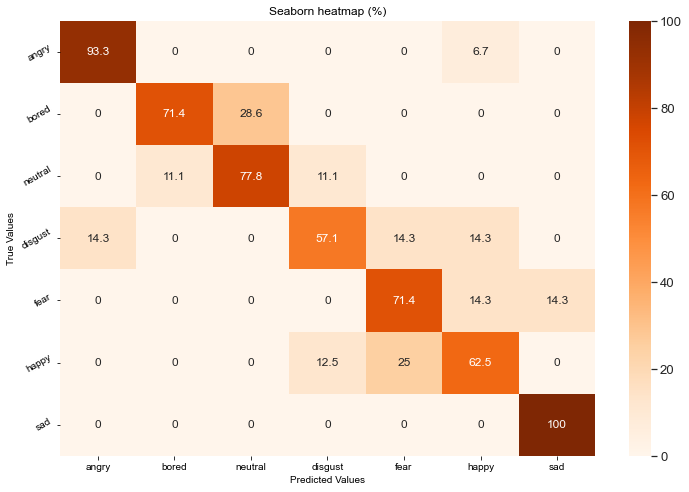

In [ ]:
## EMODB emotions : ['angry', 'bored', 'neutral', 'disgust', 'fear', 'happy', 'sad']

listik = ['angry', 'bored', 'neutral', 'disgust', 'fear', 'happy', 'sad']

df_cm1 = pd.DataFrame(array, index = [i for i in listik],
                  columns = [i for i in listik])
print(df_cm1)
print()
plt.figure(figsize = (12,8))
plt.title('Seaborn heatmap (%)')
sn.set(font_scale=1.2)
aa=sn.heatmap(df_cm1, annot=True, cmap="Oranges", fmt='g', annot_kws={"size": 12})
aa.set_yticklabels(df_cm1,rotation=30)
aa.set_ylabel('True Values')
aa.set_xlabel('Predicted Values')
plt.savefig('EmodbFemale_65.png')
plt.show()